In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [ ]:
# Load the credit-default dataset
df_train = pd.read_csv('application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Function to find missing values in dataset
def find_NA_Values(df):
    na_values_df = df.isnull().sum()
    na_values_df = na_values_df[na_values_df != 0].sort_values(ascending = False).reset_index()
    na_values_df.columns = ["features", "na_Values"]
    na_values_df["pct_missing"] = na_values_df.na_Values/len(df)
    return na_values_df

na_values_df = find_NA_Values(df_train)
na_values_df

,features,na_Values,pct_missing
0,COMMONAREA_MEDI,214865,0.698723
1,COMMONAREA_AVG,214865,0.698723
2,COMMONAREA_MODE,214865,0.698723
3,NONLIVINGAPARTMENTS_MEDI,213514,0.694330
4,NONLIVINGAPARTMENTS_MODE,213514,0.694330
...,...,...,...
62,EXT_SOURCE_2,660,0.002146
63,AMT_GOODS_PRICE,278,0.000904
64,AMT_ANNUITY,12,0.000039
65,CNT_FAM_MEMBERS,2,0.000007


In [ ]:
# To check missing values by column
df_train.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
OWN_CAR                       0
Length: 122, dtype: int64

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OWN_CAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Copies the df_train DataFrame to X and assigns the 'TARGET' column to y.
X = df_train.copy()
y = X['TARGET']

# Drops the 'SK_ID_CURR' and 'TARGET' columns from X since they are not needed for the feature set.
X = X.drop(columns = ["SK_ID_CURR", "TARGET"])

# Encodes categorical variables using one-hot encoding.
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_features)

# Scales numerical features using StandardScaler. The numerical features are identified based on their data types (float64 and int64).
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
print(X.shape)
print(y.shape)

(307511, 248)
(307511,)


### Principal Component Analysis

Variance Explained by each component:
 [0.21971482 0.04142144 0.0346549  0.03043777 0.02879401 0.02605912
 0.02297159 0.02209882 0.02031215 0.0188435 ]


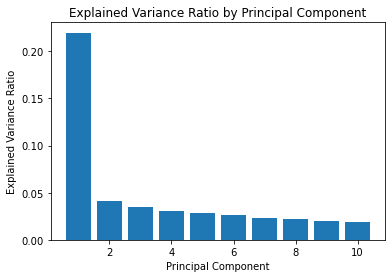

In [ ]:
# Creating PCA and determining the top 10 principal components:
features = X.columns.tolist()

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X[features])

pca_df = pd.DataFrame(data=pca_result, columns=['PC{}'.format(i+1) for i in range(10)])

explained_variance_ratio = pca.explained_variance_ratio_
print("Variance Explained by each component:\r\n", explained_variance_ratio) # Print variance ratios

# Visualize 
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


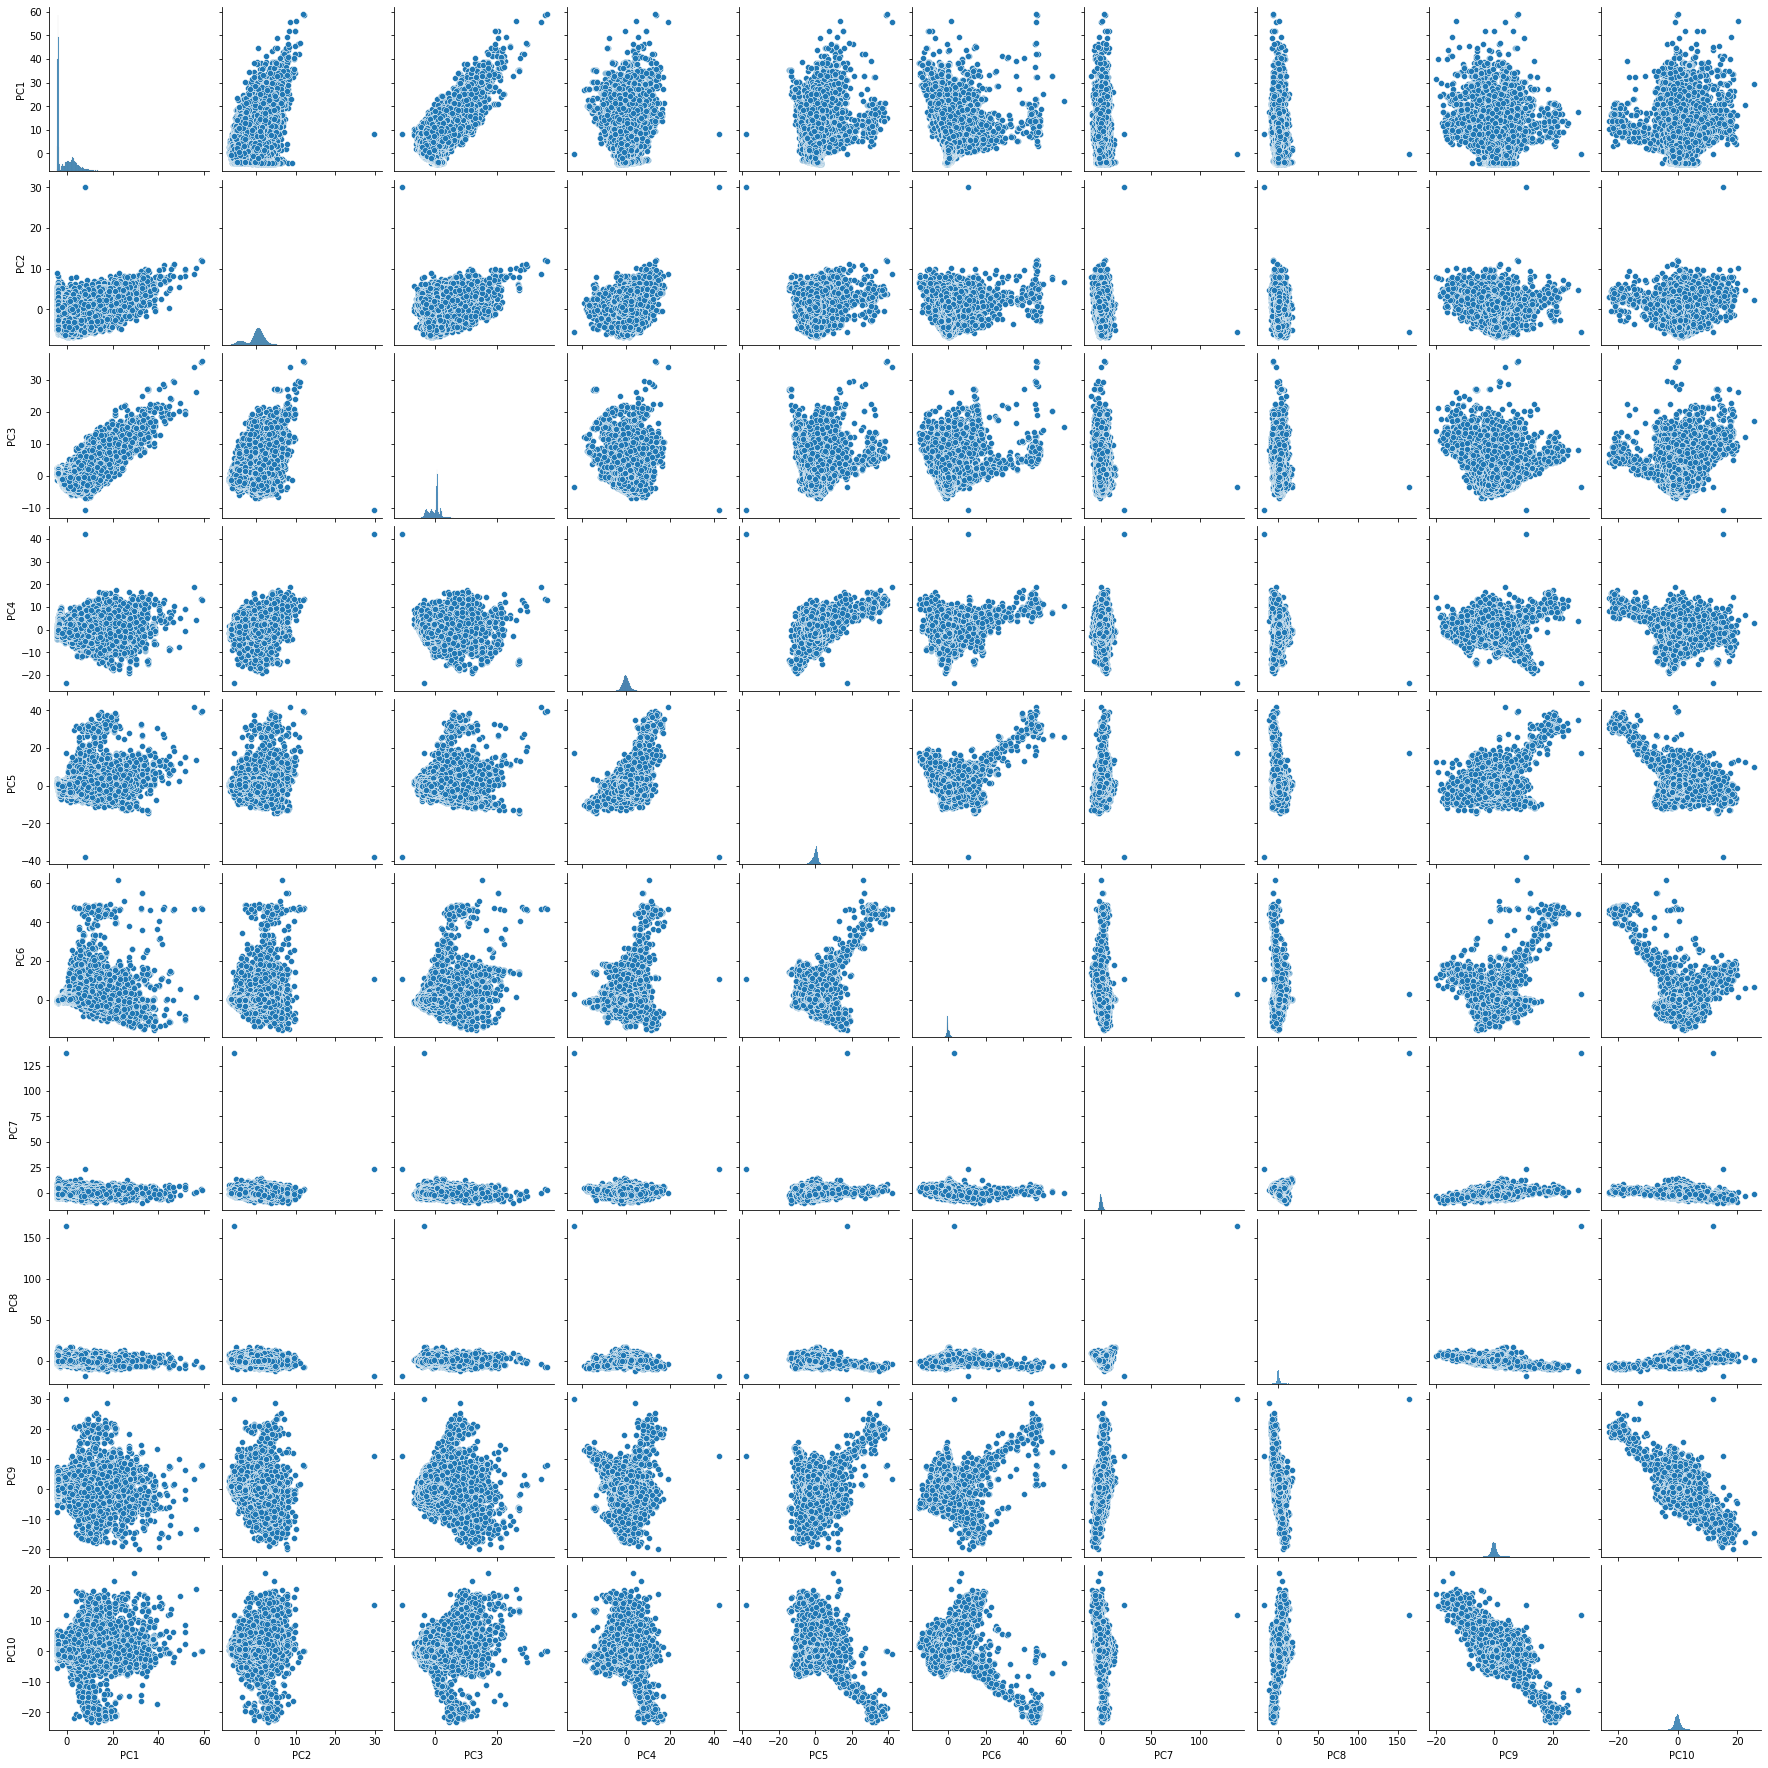

In [ ]:
# Pair plot
sns.pairplot(pca_df)

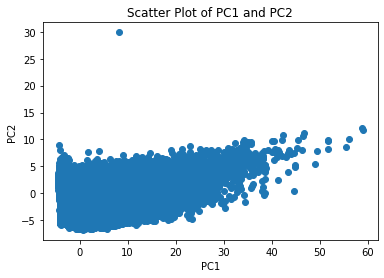

In [ ]:
# Visualizing the PCA:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 and PC2')
plt.show()

### Analyzing the density of the data based on PCA:

The explained variance ratio plot helps us understand how much information is captured by each principal component. In this case, I have used the top 10 principal components. The plot shows the proportion of the total variance explained by each principal component. The higher the explained variance ratio, the more information that component contains.

The first principal component (PC1) captures approximately 21.97% of the total variance in the data. The second principal component (PC2) explains approximately 4.14% of the variance. The subsequent principal components contribute progressively smaller percentages of variance.

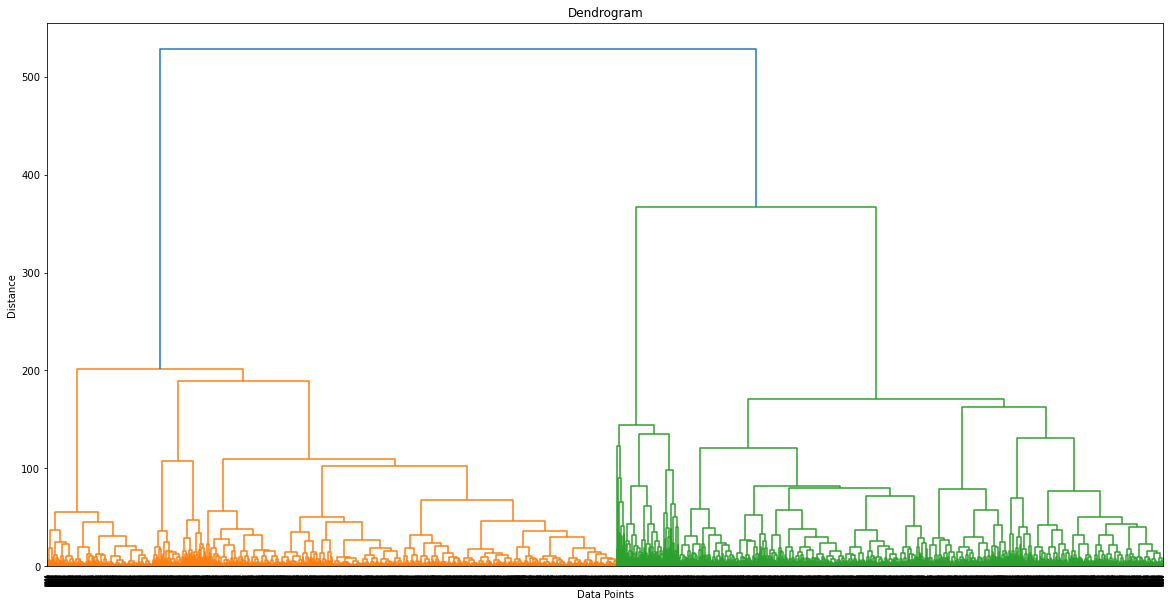

In [ ]:
# Select a random subset of the data
subset_indices = np.random.choice(range(df_train.shape[0]), size=10000, replace=False)
pca_df_subset = pd.DataFrame(pca_df).iloc[subset_indices]

distance_matrix = sch.distance.pdist(pca_df_subset)

linkage_matrix = sch.linkage(distance_matrix, method='ward')

plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(linkage_matrix)
plt.show()

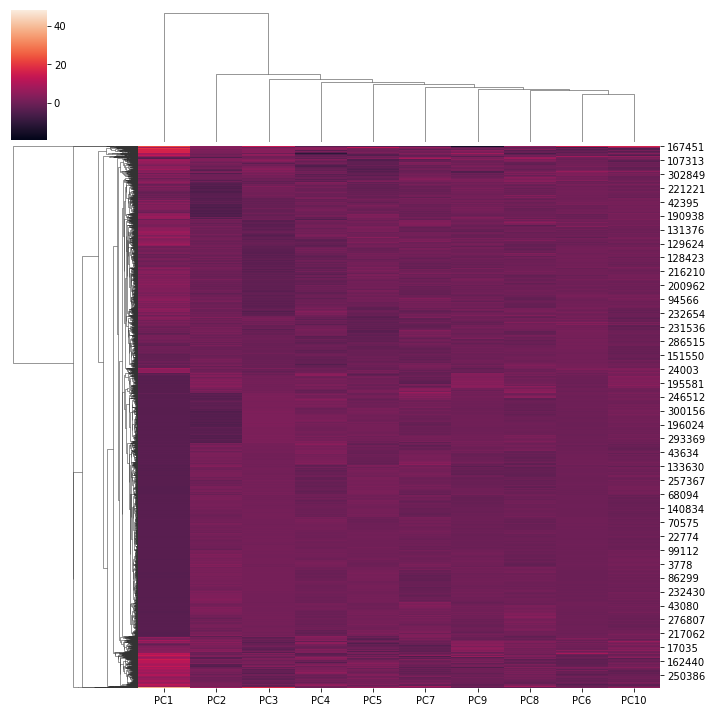

In [ ]:
sns.clustermap(pca_df_subset)

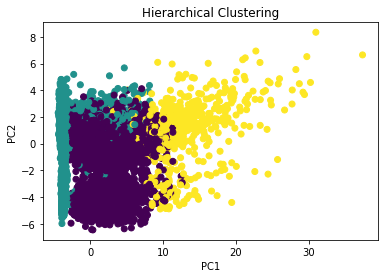

In [ ]:
# Determine the optimal number of clusters

n_clusters = 3  
hc_labels = sch.cut_tree(linkage_matrix, n_clusters=n_clusters).flatten()

plt.scatter(pca_df_subset['PC1'], pca_df_subset['PC2'], c=hc_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.show()

### Distance measure and branching order:

In the hierarchical clustering, I used the Ward's method for linkage, which minimizes the variance within each cluster. The choice of the Ward's method is common when working with numerical data and aiming to minimize the within-cluster variance.

CART (Classification and Regression Trees) In general, hierarchical clustering and CART are different algorithms with distinct goals. While hierarchical clustering aims to group similar data points together based on a distance measure, CART focuses on constructing decision trees to predict a target variable.


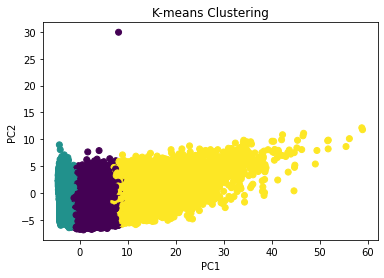

In [ ]:
# Using K-means clustering:
from sklearn.cluster import KMeans

k = 3  # Adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

### Choosing K and distance measure:

In the K-means clustering, I chose k=3 clusters. The optimal value of K would require further analysis, such as using evaluation metrics like the silhouette score or the elbow method.

The Euclidean distance measure was used by default in K-means clustering. The choice of distance measure depends on the nature of the data and the problem at hand. The Euclidean distance is commonly used when dealing with numerical features, as it measures the straight-line distance between data points in the feature space.

### Insights from K-means clustering:

K-means clustering helps identify groups of data points that share similar characteristics. By visualizing the clusters, we can gain insights into the underlying patterns in the data. The separation of data points into distinct clusters indicates that there are identifiable subgroups within the dataset. 